### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Exploratory of Data Analysis (EDA)

In [3]:
df.shape

(381109, 12)

In [4]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

- **id**: Unique ID for the customer  
- **Gender**: Gender of the customer  
- **Age**: Age of the customer  
- **Driving_License**:  
  - `0` → Customer does not have a driving license  
  - `1` → Customer already has a driving license  
- **Region_Code**: Unique code for the customer’s region  
- **Previously_Insured**:  
  - `1` → Customer already has vehicle insurance  
  - `0` → Customer does not have vehicle insurance  
- **Vehicle_Age**: Age of the vehicle  
- **Vehicle_Damage**:  
  - `1` → Customer's vehicle was damaged in the past  
  - `0` → No previous vehicle damage  
- **Annual_Premium**: Annual insurance premium amount  
- **Policy_Sales_Channel**: Encoded channel used to contact customer (Agents, Email, Phone, In-Person, etc.)  
- **Vintage**: Number of days the customer has been associated with the company  
- **Response**:  
  - `1` → Customer is interested  
  - `0` → Customer is not interested  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [7]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
id,381109.00,190555.00,110016.84,1.00,95278.00,190555.00,285832.00,381109.00
Age,381109.00,38.82,15.51,20.00,25.00,36.00,49.00,85.00
Driving_License,381109.00,1.00,0.05,0.00,1.00,1.00,1.00,1.00
Region_Code,381109.00,26.39,13.23,0.00,15.00,28.00,35.00,52.00
Previously_Insured,381109.00,0.46,0.50,0.00,0.00,0.00,1.00,1.00
Annual_Premium,381109.00,30564.39,17213.16,2630.00,24405.00,31669.00,39400.00,540165.00
Policy_Sales_Channel,381109.00,112.03,54.20,1.00,29.00,133.00,152.00,163.00
Vintage,381109.00,154.35,83.67,10.00,82.00,154.00,227.00,299.00
Response,381109.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00


In [8]:
df.describe(include=["object"]).T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [9]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


In [10]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.00,0,40454.00,26.00,217,1
1,2,76,1,3.00,0,33536.00,26.00,183,0
2,3,47,1,28.00,0,38294.00,26.00,27,1
3,4,21,1,11.00,1,28619.00,152.00,203,0
4,5,29,1,41.00,1,27496.00,152.00,39,0


In [11]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [12]:
numeric_data.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
Age,0.00,1.00,-0.08,0.04,-0.25,0.07,-0.58,-0.00,0.11
Driving_License,-0.00,-0.08,1.00,-0.00,0.01,-0.01,0.04,-0.00,0.01
Region_Code,-0.00,0.04,-0.00,1.00,-0.02,-0.01,-0.04,-0.00,0.01
Previously_Insured,0.00,-0.25,0.01,-0.02,1.00,0.00,0.22,0.00,-0.34
Annual_Premium,0.00,0.07,-0.01,-0.01,0.00,1.00,-0.11,-0.00,0.02
Policy_Sales_Channel,-0.00,-0.58,0.04,-0.04,0.22,-0.11,1.00,0.00,-0.14
Vintage,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,1.00,-0.00
Response,-0.00,0.11,0.01,0.01,-0.34,0.02,-0.14,-0.00,1.00


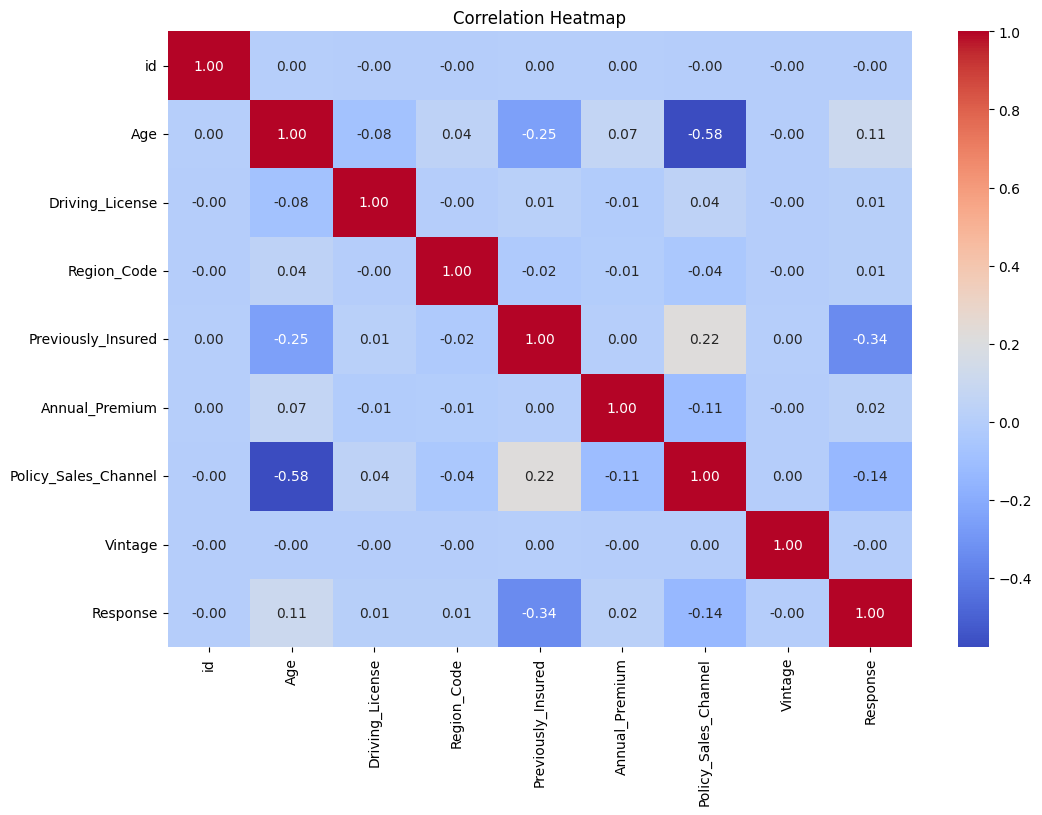

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(
    numeric_data.corr(),
    annot=True,       # shows correlation values (like text_auto=True)
    fmt=".2f",        # format for numbers
    cmap="coolwarm",  # color scheme (you can change this)
    square=False      # similar to aspect="auto"
)

plt.title("Correlation Heatmap")
plt.show()


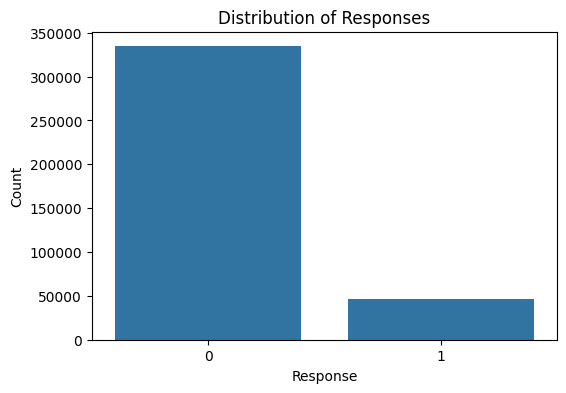

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))   # adjust as needed

sns.countplot(x='Response', data=df)

plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

plt.show()

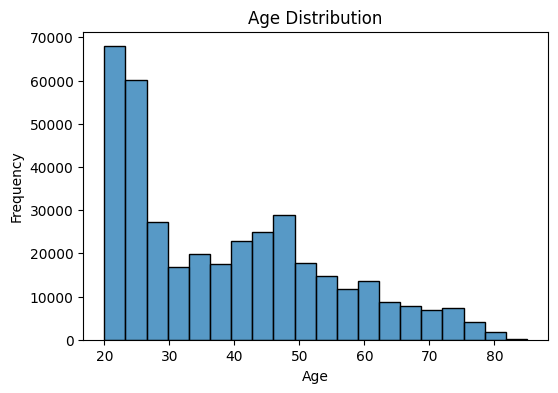

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.histplot(df['Age'], bins=20, kde=False)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()


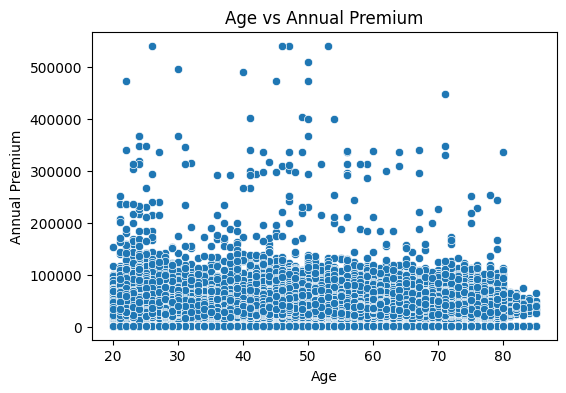

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.scatterplot(data=df, x='Age', y='Annual_Premium')

plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')

plt.show()


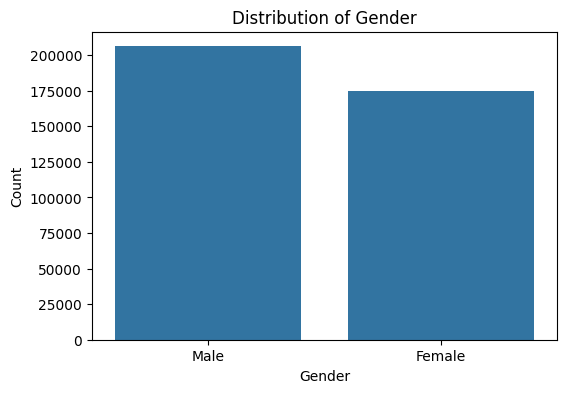

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Gender')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

plt.show()


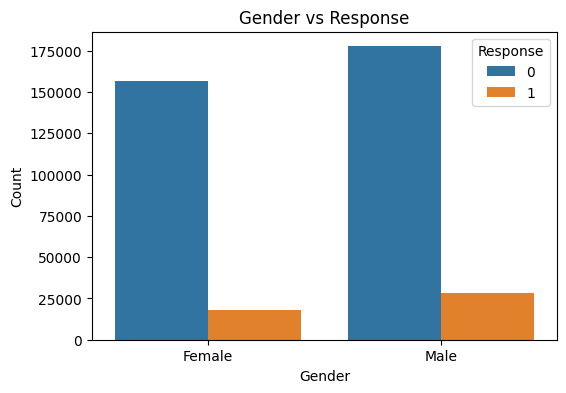

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare grouped data
data = (
    df.groupby(['Gender', 'Response'])['id']
      .count()
      .reset_index()
      .rename(columns={'id': 'count'})
)

plt.figure(figsize=(6, 4))

sns.barplot(
    data=data,
    x='Gender',
    y='count',
    hue='Response'
)

plt.title('Gender vs Response')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


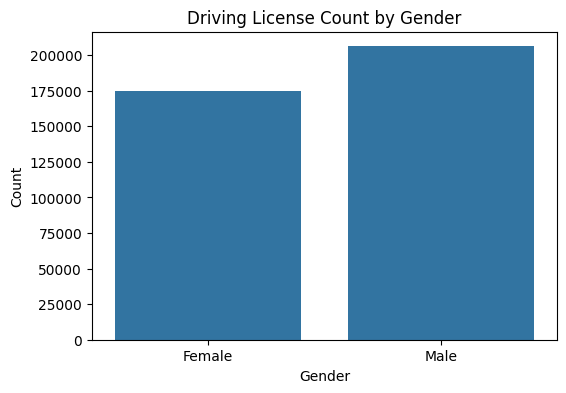

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare grouped data
data = (
    df.groupby(['Gender'])['Driving_License']
      .count()
      .reset_index()
)

plt.figure(figsize=(6, 4))

sns.barplot(
    data=data,
    x='Gender',
    y='Driving_License'
)

plt.title('Driving License Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


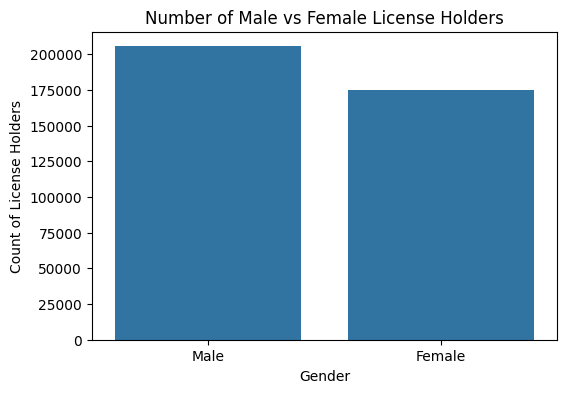

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only license holders
license_holders = df[df['Driving_License'] == 1]

plt.figure(figsize=(6, 4))

sns.countplot(
    data=license_holders,
    x='Gender'
)

plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)

plt.show()


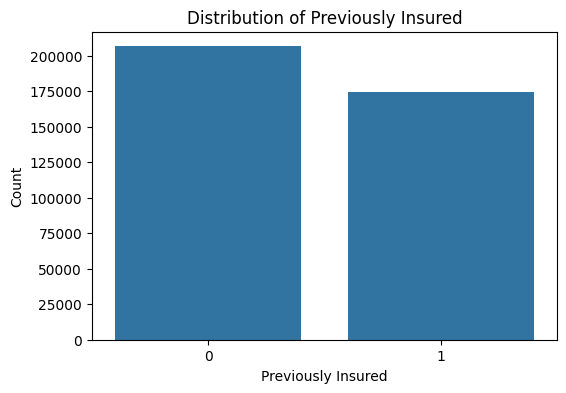

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x="Previously_Insured")

plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")

plt.show()


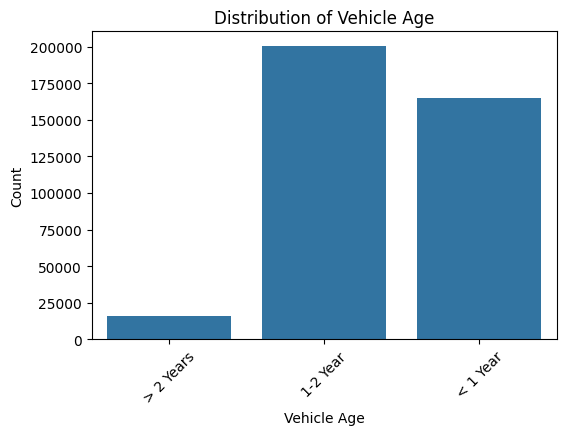

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Vehicle_Age')

plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)   # Rotate x-axis labels if needed

plt.show()


In [29]:
data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


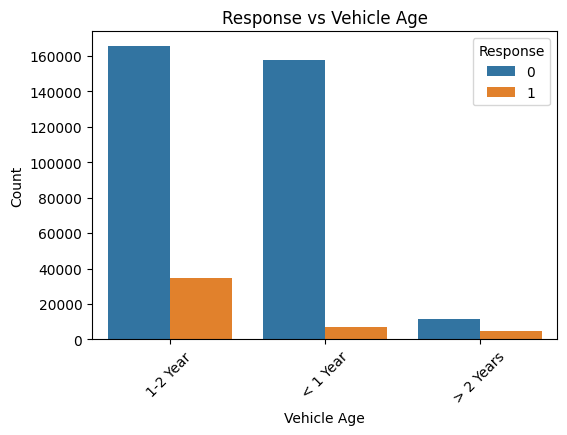

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare grouped data
data = (
    df.groupby(['Vehicle_Age', 'Response'])['id']
      .count()
      .reset_index()
      .rename(columns={'id': 'count'})
)

plt.figure(figsize=(6, 4))

sns.barplot(
    data=data,
    x='Vehicle_Age',
    y='count',
    hue='Response'
)

plt.title('Response vs Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


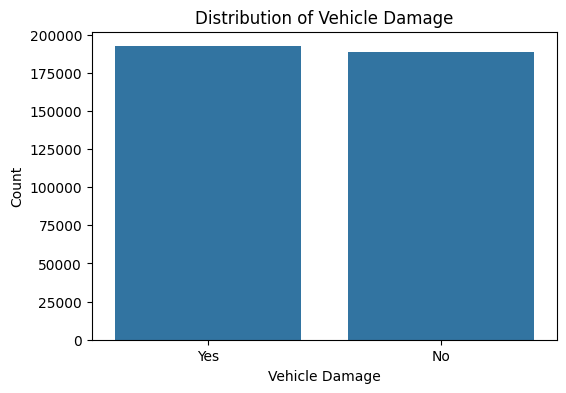

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Vehicle_Damage')

plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')

plt.show()


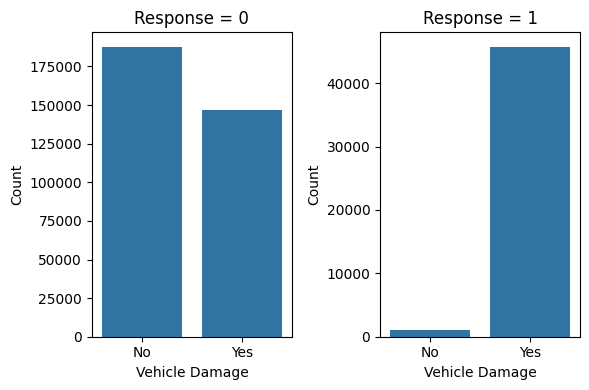

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data (already done in your code)
data = (
    df.groupby(['Vehicle_Damage', 'Response'])['id']
      .count()
      .reset_index()
      .rename(columns={'id': 'count'})
)

# Create subplots for each Response value
responses = sorted(data['Response'].unique())
num_responses = len(responses)

plt.figure(figsize=(6, 4))

for i, r in enumerate(responses):
    plt.subplot(1, num_responses, i + 1)
    subset = data[data['Response'] == r]

    sns.barplot(
        data=subset,
        x='Vehicle_Damage',
        y='count'
    )

    plt.title(f"Response = {r}")
    plt.xlabel("Vehicle Damage")
    plt.ylabel("Count")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


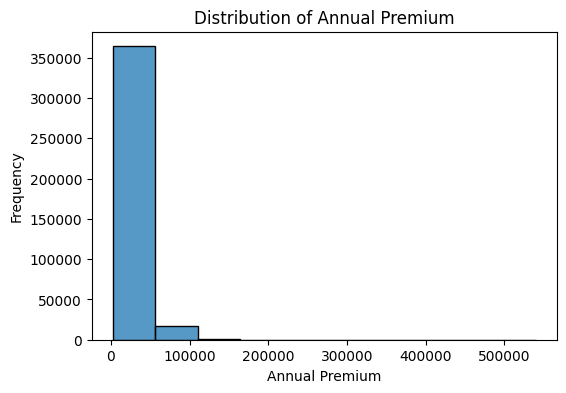

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.histplot(df['Annual_Premium'], bins=10, kde=False)

plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Premium')

plt.show()


In [39]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.00,0,> 2 Years,Yes,40454.00,26.00,217,1
1,2,Male,76,1,3.00,0,1-2 Year,No,33536.00,26.00,183,0
2,3,Male,47,1,28.00,0,> 2 Years,Yes,38294.00,26.00,27,1
3,4,Male,21,1,11.00,1,< 1 Year,No,28619.00,152.00,203,0
4,5,Female,29,1,41.00,1,< 1 Year,No,27496.00,152.00,39,0


### Data Preprocessing

In [40]:
# Drop ID column as it is not needed for analysis
df = df.drop(columns=['id'])

In [41]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.00,0,> 2 Years,Yes,40454.00,26.00,217,1
1,Male,76,1,3.00,0,1-2 Year,No,33536.00,26.00,183,0
2,Male,47,1,28.00,0,> 2 Years,Yes,38294.00,26.00,27,1
3,Male,21,1,11.00,1,< 1 Year,No,28619.00,152.00,203,0
4,Female,29,1,41.00,1,< 1 Year,No,27496.00,152.00,39,0


In [42]:
# Normalize column names and string values to lowercase
df.columns = df.columns.str.lower()
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,male,44,1,28.00,0,> 2 years,yes,40454.00,26.00,217,1
1,male,76,1,3.00,0,1-2 year,no,33536.00,26.00,183,0
2,male,47,1,28.00,0,> 2 years,yes,38294.00,26.00,27,1
3,male,21,1,11.00,1,< 1 year,no,28619.00,152.00,203,0
4,female,29,1,41.00,1,< 1 year,no,27496.00,152.00,39,0


In [ ]:
# Categorycal values in vehicle_age column checking
df["vehicle_age"].unique()

array(['> 2 years', '1-2 year', '< 1 year'], dtype=object)

In [46]:
df['vehicle_age'] = df['vehicle_age'].replace({
    '> 2 years': 'greater_than_two_year',
    '1-2 year': 'between_one_and_two_year',
    '< 1 year': 'less_than_one_year'
})


In [47]:
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,male,44,1,28.00,0,greater_than_two_year,yes,40454.00,26.00,217,1
1,male,76,1,3.00,0,between_one_and_two_year,no,33536.00,26.00,183,0
2,male,47,1,28.00,0,greater_than_two_year,yes,38294.00,26.00,27,1
3,male,21,1,11.00,1,less_than_one_year,no,28619.00,152.00,203,0
4,female,29,1,41.00,1,less_than_one_year,no,27496.00,152.00,39,0


In [49]:
# Categorycal values in gender column checking
df["gender"].unique()

array(['male', 'female'], dtype=object)

In [50]:
# Categorycal values in vehicle_damage column checking
df["vehicle_damage"].unique()

array(['yes', 'no'], dtype=object)

In [51]:
# Map Gender → (0, 1) and Map Vehicle_Damage → (Yes = 1, No = 0)
df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df['vehicle_damage'] = df['vehicle_damage'].map({'yes': 1, 'no': 0})


In [52]:
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,44,1,28.00,0,greater_than_two_year,1,40454.00,26.00,217,1
1,1,76,1,3.00,0,between_one_and_two_year,0,33536.00,26.00,183,0
2,1,47,1,28.00,0,greater_than_two_year,1,38294.00,26.00,27,1
3,1,21,1,11.00,1,less_than_one_year,0,28619.00,152.00,203,0
4,0,29,1,41.00,1,less_than_one_year,0,27496.00,152.00,39,0


In [53]:
category_columns = df.select_dtypes(include = ['object']).columns
category_columns

Index(['vehicle_age'], dtype='object')

In [54]:
df = pd.get_dummies(df, columns = category_columns, drop_first=True)
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_greater_than_two_year,vehicle_age_less_than_one_year
0,1,44,1,28.00,0,1,40454.00,26.00,217,1,1,0
1,1,76,1,3.00,0,0,33536.00,26.00,183,0,0,0
2,1,47,1,28.00,0,1,38294.00,26.00,27,1,1,0
3,1,21,1,11.00,1,0,28619.00,152.00,203,0,0,1
4,0,29,1,41.00,1,0,27496.00,152.00,39,0,0,1


In [56]:
# train-test split

from sklearn.model_selection import train_test_split
x = df.drop(['response'], axis = 1)
y = df['response']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("x_train - >  ",X_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",X_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (304887, 11)
y_train - >   (304887,)
x_test  - >   (76222, 11)
y_test  - >   (76222,)


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# RandomForest model
rf = RandomForestClassifier(random_state=42)

# Randomized search (choose n_iter based on speed)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,               # tries only 30 random combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit
random_search.fit(X_train, y_train)

# Results
print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

best_rf = random_search.best_estimator_

# Predict & evaluate
y_pred = best_rf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Best CV score: 0.8780761397734886

Test Accuracy: 0.875088557109496

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.67      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.77      0.50      0.47     76222
weighted avg       0.85      0.88      0.82     76222


Confusion Matrix:
 [[66697     2]
 [ 9519     4]]


In [63]:
# save model
import pickle

filename = 'rf_model.pkl'
pickle.dump(random_search, open(filename, 'wb'))

In [64]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

In [65]:
from sklearn.metrics import classification_report

y_pred=random_search.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.67      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.77      0.50      0.47     76222
weighted avg       0.85      0.88      0.82     76222

